# Project-008-2 Heart Disease 

### Predicting Heart Disease Diagnosis

### Introduction 

The cardiovascular system encompasses an intricate network of blood vessels, including veins, arteries, and capillaries, which facilitate the circulation of blood throughout the body. Any disruptions in the flow of blood emanating from the heart can lead to various forms of heart diseases, collectively referred to as cardiovascular or heart diseases. Globally, heart diseases constitute a leading cause of mortality - the World Health Organization (WHO) indicates that approximately 17.5 million deaths annually are attributable to heart attacks and strokes. Consequently, the early detection of cardiac anomalies is imperative as it can significantly save lives and assist healthcare professionals in crafting effective treatment strategies. 

In this study, we will examine a dataset that contains test results from 303 patients referred for coronary angiography at the Cleveland Clinic in Ohio between May 1981 and September 1984. All the patients had similar medical profiles and underwent the same non-invasive tests, namely, exercise electrocardiogram, exercise thallium scintigraphy and fluoroscopy for coronary calcium. 

The clinical and test variables included in this dataset are per the below, while the target variable is the angiographic disease status, where the value 0 corresponds to the major vessels show less than 50% narrowing of the vessels diameter while the value 1 corresponds to showing greater than 50% narrowing of the vessels diameter.

Clinical 
Age
Sex
1 = male
0 = female 
Chest Pain Type 
1 = typical anginal 
2 = atypical anginal
3 = nonanginal 
4 = asymptomatic
Systolic Blood Pressure (in mmHg on admission to the hospital)

Routine Test Data Collected
Serum cholesterol determination (in mg/dl) 
Fasting blood sugar determination (fasting blood sugar > 120 mg/dl)
	1 = true
	0 = false
Resting electrocardiographic results
	0 = normal
	1 = having ST-T wave abnormality
	2 = showing probable or definite left ventricular hypertrophy by Estes’ criteria

Exercise Test Data Collected
Maximum heart rate achieved (beats per minute)
Exercise induced angina 
	1 = yes
	0 = no
ST depression induced by exercise relative to rest
Slope of the peak exercise ST segment
1 = upsloping 
2 = flat
3 = downsloping 

Other Non-invasive Test Data Collected
Number of major vessels colored by fluoroscopy for coronary calcium (0 - 3)
Exercise thallium scintigraphy results
3 = normal
6 = fixed defect
7 = reversible defect

In this study, we will address the predictive question: can we use clinical and test data available to us to predict a diagnosis of heart disease. This is important as it provides a quick and data-driven method to diagnose heart disease and eliminates subjectivity and dependence on the skill and experience of the diagnosing physician. 


In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'tests.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [3]:
heart_disease <- read_csv("processed.cleveland.data", col_names = FALSE)
colnames(heart_disease) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
heart_disease

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


### Methods 
Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?

For this project, we will conduct a classification prediction by all six numeric variables, since categorical variables are not on any scale, and can cause confusion as a predictor, it is better that this
study excludes categorical variables as predictors. Numeric variables will be separated in to groups base on their relationship with the target, then we will create several candidate classification models and find the one with highest accuracy to apply for the prediction.



Describe at least one way that you will visualize the results



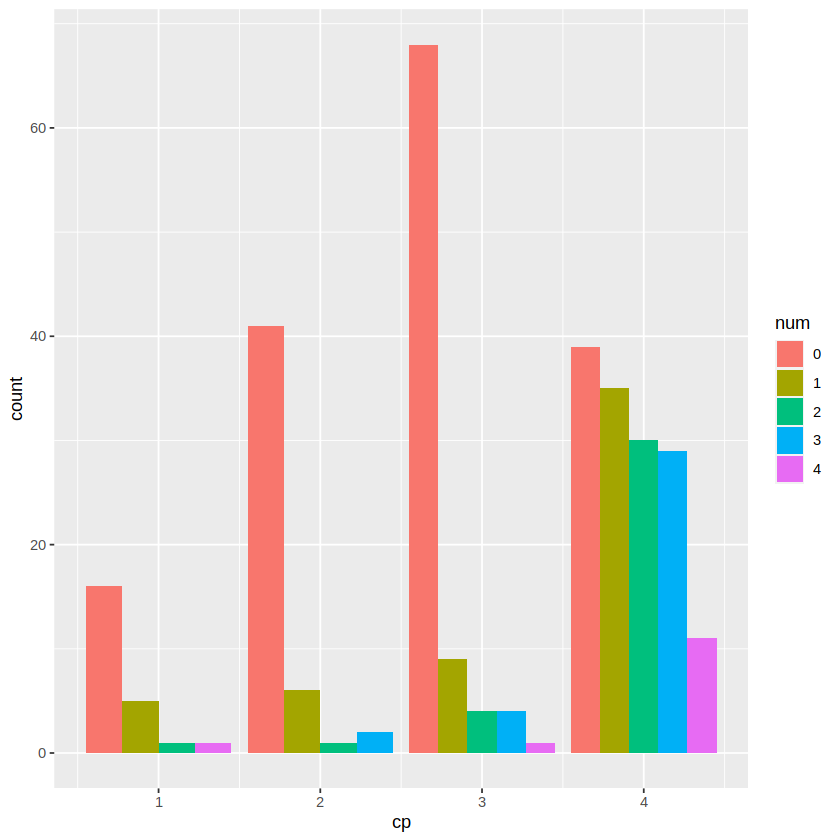

In [4]:
heart_disease <- mutate(heart_disease, num = as.factor(num))
heart_disease_plot <- heart_disease |>
ggplot(aes (x = cp, fill = num)) +
geom_bar(position = "dodge")
heart_disease_plot
#The plot shows that people with type 4 chest pain (asymptomatic, so actually no chest pain) are more likely to be diagnosed with cancer

In [5]:
heart_disease_split <- initial_split(heart_disease , prop = 0.75, strata = num)  
heart_disease_train <- training(heart_disease_split)   
heart_disease_test<- testing(heart_disease_split)
head(heart_disease_train)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,0,4,128,205,0,1,130,1,2.0,2,1.0,7.0,3
59,1,4,164,176,1,2,90,0,1.0,2,2.0,6.0,3
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
